In [ ]:
#Kita akan mengimpor terlebih dahulu
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Regresi Linear

In [ ]:
#Kemudian Buat dataframe menjadi dataset
df = pd.DataFrame({'Arabica': [8, 2, 6, 9, 4, 5, 7, 3],
    'Robusha': [7, 3, 7, 10, 2, 6, 8, 3], 'Harga': [15,10,8,4,5,6,8,9]
})
df

,Arabica,Robusha,Harga
0,8,7,15
1,2,3,10
2,6,7,8
3,9,10,4
4,4,2,5
5,5,6,6
6,7,8,8
7,3,3,9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Menentukan tulis kembali pada dataframe
data_1 = pd.DataFrame([[8, 7,15], [2, 3,10], [6, 7, 88], [9, 10,4], [4, 2,5], [5, 6,6], [7, 8,8], [3, 3,9]])
data_1.columns = ['Arabica(x)', 'Robusha(y)', 'Harga(z)']
data_1

,Arabica(x),Robusha(y),Harga(z)
0,8,7,15
1,2,3,10
2,6,7,88
3,9,10,4
4,4,2,5
5,5,6,6
6,7,8,8
7,3,3,9


In [ ]:
#Lalu buat dalam values nya
X = data_1["Arabica(x)"].values[:, np.newaxis]
y = data_1["Robusha(y)"].values
z = data_1["Harga(z)"].values

In [ ]:
#Kita akan menggunakan train test split
X_train, X_test, y_train, y_test , z_train, z_test= train_test_split(X, y,z, test_size =  0.2)

In [ ]:
#Kita akan menggunakan Linear regresi sederhana
lr = LinearRegression()
lr.fit(X, y,z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Kemudian print intercept sm koefisien 
print("Intercept :" + str(lr.intercept_))
print("Coefficient :" + str(lr.coef_))

Intercept :0.8703942625128072
Coefficient :[0.95793648]


In [ ]:
#Lalu buat array dengan X test untuk prediksi 
X_test_1 = [[4],[5],[7]]

In [ ]:
#lalu, kita akn prediksi akan sama dengan hasil prediksi 
predict_result = lr.predict(X_test_1)

In [ ]:
print(predict_result)

[4.70214017 5.66007665 3.7442037 ]


<function matplotlib.pyplot.show>

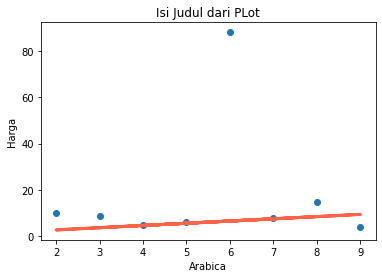

In [ ]:
predict_for_xtrain = lr.predict(X)

temporary_dataframe =  pd.DataFrame({
    'x': data_1["Arabica(x)"],
    #'y': predict_for_xtrain,
    'z':predict_for_xtrain
})

plt.scatter(data_1["Arabica(x)"], data_1["Harga(z)"])

plt.plot(temporary_dataframe['x'],temporary_dataframe['z'], color='tomato' ,linewidth = 3)

plt.xlabel("Arabica")
plt.ylabel("Harga")

plt.title("Isi Judul dari PLot")

plt.show

<function matplotlib.pyplot.show>

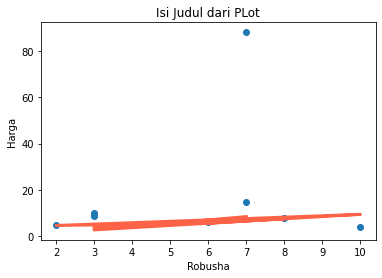

In [ ]:
predict_for_xtrain = lr.predict(X)

temporary_dataframe =  pd.DataFrame({
    'x': predict_for_xtrain,
    'y': data_1["Robusha(y)"],
    'z':predict_for_xtrain
})

plt.scatter( data_1["Robusha(y)"], data_1["Harga(z)"])

plt.plot(temporary_dataframe['y'],temporary_dataframe['z'], color='tomato' ,linewidth = 3)

plt.xlabel("Robusha")
plt.ylabel("Harga")

plt.title("Isi Judul dari PLot")

plt.show

#Logistic Regression

In [ ]:
df_iris = load_iris()

In [ ]:
df_iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris_df = pd.DataFrame(data=np.c_[df_iris['data'], df_iris['target']], 
                         columns= df_iris['feature_names']+['target'])

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


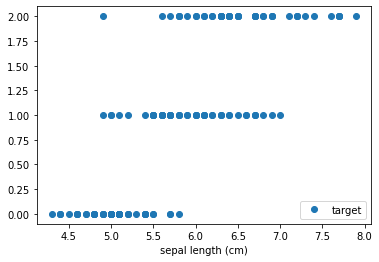

In [ ]:
iris_df.plot(x="sepal length (cm)", y="target", style="o")

In [ ]:
X =  iris_df.iloc[:, :-1]
y =  iris_df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [ ]:
model_lrg = LogisticRegression()

model_lrg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
40                 5.0               3.5                1.3               0.3
115                6.4               3.2                5.3               2.3
143                6.8               3.2                5.9               2.3
38                 4.4               3.0                1.3               0.2
148                6.2               3.4                5.4               2.3
16                 5.4               3.9                1.3               0.4
144                6.7               3.3                5.7               2.5
23                 5.1               3.3                1.7               0.5
93                 5.0               2.3                3.3               1.0
66                 5.6               3.0                4.5               1.5
100                6.3               3.3                6.0               2.5
112                6.8               3.0                5.5     

In [ ]:
X_test.reset_index(drop=True, inplace=True)

In [ ]:
prd = model_lrg.predict(X_test)

In [ ]:
prd_df = pd.DataFrame(prd)

In [ ]:
print(prd_df)

      0
0   0.0
1   2.0
2   2.0
3   0.0
4   2.0
5   0.0
6   2.0
7   0.0
8   1.0
9   1.0
10  2.0
11  2.0
12  2.0
13  1.0
14  1.0
15  2.0
16  2.0
17  2.0
18  1.0
19  0.0
20  1.0
21  1.0
22  0.0
23  1.0
24  1.0
25  2.0
26  1.0
27  2.0
28  2.0
29  0.0


In [ ]:
result = pd.concat([X_test, prd_df], axis = 1, ignore_index = True)

In [ ]:
result

,0,1,2,3,4
0,5.0,3.5,1.3,0.3,0.0
1,6.4,3.2,5.3,2.3,2.0
2,6.8,3.2,5.9,2.3,2.0
3,4.4,3.0,1.3,0.2,0.0
4,6.2,3.4,5.4,2.3,2.0
5,5.4,3.9,1.3,0.4,0.0
6,6.7,3.3,5.7,2.5,2.0
7,5.1,3.3,1.7,0.5,0.0
8,5.0,2.3,3.3,1.0,1.0
9,5.6,3.0,4.5,1.5,1.0
